# Exercise 11

## Exercise 1 - Implement K-Nearest Neighbour

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
import random
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Splitting the data to train and test

In [2]:
def split_data(X,y,testsize):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)
    return X_train, X_test, y_train, y_test

### Get numeric for Class names

In [3]:
def numeric_class(data):
    data['class'] = pd.factorize(irisdata['class'])[0] + 1
    return data

### Euclidean distance measure

In [4]:
def euclidean_distance(train_var,test_var):
    distance = 0
    for i in range(0,len(train_var)):
        distance += (train_var[i] - test_var[i]) ** 2
    return np.sqrt(distance)

### Get class names

In [5]:
def get_names(data):
    data_name = list()
    irisclass = ["Iris-Setosa","Iris-Versicolour","Iris-Virginica"]
    for i in data:
        data_name.append(irisclass[i-1])
    return data_name

### Predict Class label

In [6]:
def predict_class(neighbours):
    
    neighbours_count = Counter(neighbours)
    predictedclass = list()
    maximum = max(neighbours_count.values())
    for i in (neighbours_count):
        if neighbours_count[i] == maximum:
            predictedclass.append(i)
    return predictedclass[0]
#     if len(predictedclass)>1:
#         return random.choice(predictedclass)
#     else:
#         return predictedclass[0]

### Quality of the prediction measure:

In [21]:
def accuracy(y_test,y_pred_test):
    misclassified_test = 0
    for index,i in enumerate(y_test):
        if i != y_pred_test[index]:
            misclassified_test += 1
    return (len(y_test) - misclassified_test)/len(y_test)

### Criterion for choosing optimal value of k:

In [79]:
def kfold(X_train,Y_train,fold,k):
    split = math.ceil(len(X_train)/fold)
    fold_mcrate = np.zeros((fold,k))
    
    for i in range (0,fold):
        start = i*split
        end = i*split+split
        
        if start ==0:
            fold_Xtest = X_train[start:end]
            fold_Xtrain = X_train[end:]
            fold_Ytest = Y_train[start:end]
            fold_Ytrain = Y_train[end:]
            fold_Xtrainold = fold_Xtrain
        else:
            fold_Xtest = X_train[start:end]
            fold_Xtrain1 = X_train[0:start]
            fold_Xtrain2 = X_train[end:-1]
            fold_Xtrain = np.concatenate((fold_Xtrain1,fold_Xtrain2))
            fold_Ytest = Y_train[start:end]
            fold_Ytrain1 = Y_train[0:start]
            fold_Ytrain2 = Y_train[end:-1]
            fold_Ytrain = np.concatenate((fold_Ytrain1,fold_Ytrain2))
        
        fold_mcrate[i],pred = knn_(fold_Xtrain,fold_Xtest,fold_Ytrain,fold_Ytest,k)

    return fold_mcrate

### K-NN algorithm:

In [80]:
def knn_(X_train, X_test, y_train, y_test,k_val):
    
    mcrate_train = list()
    mcrate_test = list()
    y_pred = list()
    for k in range (1,k_val+1):
        neighbours_test = list()
        distance_test = dict()
        y_pred_test = list()
        neighbours_train = list()
        distance_train = dict()
        y_pred_train = list()
        for i in range(0,len(X_test)):
            test_var = X_test[i]
            for j in range(0,len(X_train)):
                train_var = X_train[j]
                distance_test[(euclidean_distance(train_var,test_var)),j,i] =j 
            for it,a in enumerate(sorted(distance_test)):
                if it < k:
                    neighbours_test.append(y_train[distance_test[a]])
            y_pred_test.append(predict_class(neighbours_test))
            distance_test = dict()
            neighbours_test = list()
        mcrate_test.append(accuracy(y_test,y_pred_test))        
        y_pred.append(y_pred_test)
    return mcrate_test,y_pred
        
                                 
                                 

### Importing the data

In [10]:
winedata = pd.read_csv("winequality-red.csv",delimiter = ";")
winedata = winedata.drop(columns = ['residual sugar','free sulfur dioxide','pH','fixed acidity','chlorides','total sulfur dioxide'])

In [16]:
winedata.head()

,volatile acidity,citric acid,density,sulphates,alcohol,quality
0,0.70,0.00,0.9978,0.56,9.4,5
1,0.88,0.00,0.9968,0.68,9.8,5
2,0.76,0.04,0.9970,0.65,9.8,5
3,0.28,0.56,0.9980,0.58,9.8,6
4,0.70,0.00,0.9978,0.56,9.4,5


### Split dataset to train and test

In [13]:
y = winedata['quality']
X = winedata.drop(columns='quality')
X_train, X_test, y_train, y_test = split_data(X,y,0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [81]:
fold_mcrate = kfold(X_train,y_train,10,k)
mcrate_cv = list()
for i in range(0,k):
    mcrate_cv.append(np.average(fold_mcrate[:,i]))

In [82]:
optimaldata = pd.DataFrame(columns=range(1,k+1))
optimaldata.loc[0] = mcrate_cv
optimaldata

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.579963,0.522756,0.529947,0.570125,0.553193,0.56028,0.565718,0.561229,0.570158,0.573737,0.571943,0.569257,0.566562,0.565669,0.568348



 Optimal K:  1
 Accuracy:  0.5799629987129987


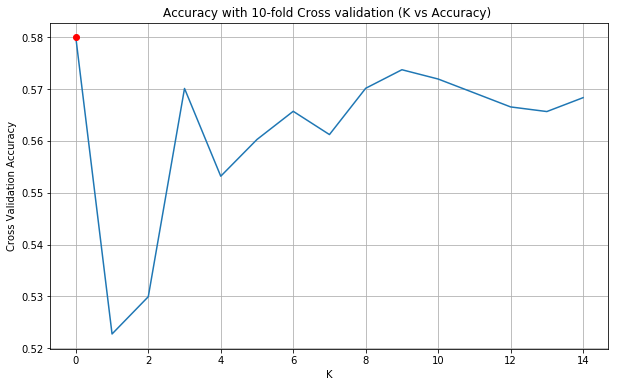

In [83]:
print("\n Optimal K: " ,mcrate_cv.index(max(mcrate_cv))+1)
print(" Accuracy: ",max(mcrate_cv))
plt.figure(figsize=(10,6))
plt.plot(mcrate_cv)
plt.grid()
plt.title("Accuracy with 10-fold Cross validation (K vs Accuracy) ")
plt.plot(mcrate_cv.index(max(mcrate_cv)),max(mcrate_cv),'ro')
plt.xlabel("K")
plt.ylabel("Cross Validation Accuracy")
plt.show()

### Classification using Nearest neighbour  - sklearn

In [14]:
def knn_classifier(X_train,X_test,y_train,y_test,k):
    k_scores = list()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    return y_pred

In [15]:
k = 15
y_pred = knn_classifier(X_train,X_test,y_train,y_test,k)

In [18]:
Prediction = pd.DataFrame(columns=X.columns)
Prediction['volatile acidity'] = X_test[:,0]
Prediction['citric acid'] = X_test[:,1]
Prediction['density'] = X_test[:,2]
Prediction['sulphates'] = X_test[:,3]
Prediction['alcohol'] = X_test[:,4]
Prediction['quality'] = y_test
Prediction['Prediction quality'] = y_pred

In [23]:
print("\nK: ",k)
print("Accuracy of prediction: ",accuracy(y_test,y_pred))
print("Number of misclassifications: ", len(y_test) - (accuracy(y_test,y_pred) * len(y_test)),"\n")
Prediction.sample(10)


K:  15
Accuracy of prediction:  0.6125
Number of misclassifications:  186.0 



,volatile acidity,citric acid,density,sulphates,alcohol,quality,Prediction quality
4,0.65,0.02,0.99498,0.62,10.4,6,6
362,0.12,0.45,0.99552,0.76,11.9,7,6
437,0.37,0.52,0.99613,0.58,11.1,6,6
24,0.61,0.14,0.99690,0.59,9.5,5,5
252,0.49,0.36,0.99702,0.78,10.9,6,6
336,0.43,0.21,0.99660,0.91,9.5,5,5
136,0.47,0.00,0.99220,0.48,12.3,6,6
90,0.73,0.24,0.99670,0.59,9.3,5,5
61,0.54,0.26,0.99760,0.60,9.3,6,5
70,0.52,0.38,0.99666,0.52,9.4,5,5


### To find optimal hyperparameter for nearest neighbour classifier

In [29]:
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [35]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
grid.best_params_,grid.best_score_

({'n_neighbors': 19}, 0.579982126899017)

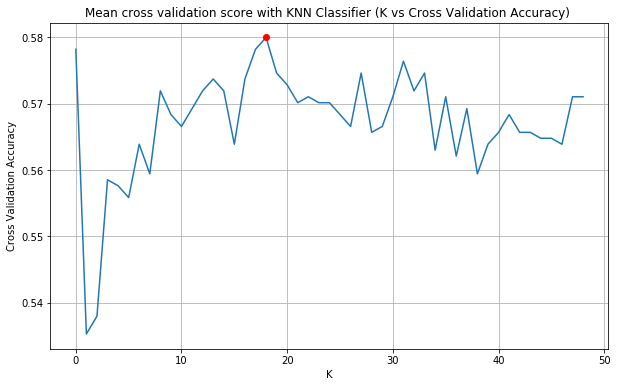

In [37]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(grid.cv_results_['mean_test_score'])
plt.title("Mean cross validation score with KNN Classifier (K vs Cross Validation Accuracy) ")
plt.plot(grid.best_estimator_.n_neighbors-1,grid.best_score_,'ro')
plt.xlabel("K")
plt.ylabel("Cross Validation Accuracy")
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors = grid.best_estimator_.n_neighbors)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [39]:
Prediction = pd.DataFrame(columns=X.columns)
Prediction['volatile acidity'] = X_test[:,0]
Prediction['citric acid'] = X_test[:,1]
Prediction['density'] = X_test[:,2]
Prediction['sulphates'] = X_test[:,3]
Prediction['alcohol'] = X_test[:,4]
Prediction['quality'] = y_test
Prediction['Prediction quality'] = y_pred

In [41]:
print("\nK: ",grid.best_estimator_.n_neighbors)
print("Accuracy of prediction: ",accuracy(y_test,y_pred))
print("Number of misclassifications: ", len(y_test) - (accuracy(y_test,y_pred) * len(y_test)),"\n")
Prediction.sample(10)


K:  19
Accuracy of prediction:  0.6145833333333334
Number of misclassifications:  185.0 



,volatile acidity,citric acid,density,sulphates,alcohol,quality,Prediction quality
476,0.65,0.02,0.99498,0.62,10.4,6,6
178,0.31,0.40,0.99536,0.68,11.2,7,7
433,0.65,0.37,1.00260,0.64,10.4,6,6
169,0.43,0.25,0.99615,0.58,10.5,6,6
59,0.58,0.00,0.99562,0.58,11.3,6,6
132,0.47,0.27,0.99518,0.85,11.1,6,6
269,0.60,0.01,0.99514,0.61,10.9,6,6
91,0.45,0.36,0.99780,0.83,10.5,5,6
276,0.50,0.11,0.99545,0.79,9.5,5,5
206,0.35,0.47,0.99585,0.52,12.0,6,6


### Classification using Decision Tree Classifier - sklearn

In [84]:
def DecTreeClassifier(X_train,X_test,y_train,y_test):
    
    classifier = DecisionTreeClassifier(random_state=0)
    classifier.fit(X_train,y_train)
    print(classifier.get_params)
    y_pred = classifier.predict(X_test)
    return y_pred

In [85]:
y_pred = DecTreeClassifier(X_train,X_test,y_train,y_test)
acc = accuracy(y_pred,y_test)
acc

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')>


0.5916666666666667

In [86]:
Prediction = pd.DataFrame(columns=X.columns)
Prediction['volatile acidity'] = X_test[:,0]
Prediction['citric acid'] = X_test[:,1]
Prediction['density'] = X_test[:,2]
Prediction['sulphates'] = X_test[:,3]
Prediction['alcohol'] = X_test[:,4]
Prediction['quality'] = y_test
Prediction['Prediction quality'] = y_pred

In [88]:
print("\nK: ",grid.best_index_)
print("Accuracy of prediction: ",accuracy(y_test,y_pred))
print("Number of misclassifications: ", len(y_test) - (accuracy(y_test,y_pred) * len(y_test)),"\n")
Prediction.sample(10)


K:  9
Accuracy of prediction:  0.5916666666666667
Number of misclassifications:  196.0 



,volatile acidity,citric acid,density,sulphates,alcohol,quality,Prediction quality
34,0.61,0.01,0.99746,0.73,10.5,5,5
426,0.39,0.47,0.99820,0.75,9.8,6,6
238,0.34,0.52,1.00140,0.81,9.5,6,6
309,0.36,0.64,0.99800,0.66,12.5,6,6
78,0.52,0.38,0.99666,0.52,9.4,5,5
331,0.55,0.03,0.99560,0.48,9.0,4,4
106,0.54,0.04,0.99870,0.91,9.4,6,6
428,0.50,0.18,0.99761,0.72,9.6,6,6
203,0.55,0.15,0.99314,0.82,11.6,6,7
267,0.57,0.09,0.99417,0.74,12.7,8,6


In [91]:
min_samples_splits = np.linspace(0.1, 1.0, 3, endpoint=True)
max_depth = range(1,5)
param_grid = dict(min_samples_split=min_samples_splits,max_depth = max_depth)
print(param_grid)

{'min_samples_split': array([0.1 , 0.55, 1.  ]), 'max_depth': range(1, 5)}


In [92]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid)

In [93]:
grid.fit(X_train,y_train)

c:\users\raaghav\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': array([0.1 , 0.55, 1.  ]), 'max_depth': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
grid.best_params_,grid.best_score_

({'max_depth': 4, 'min_samples_split': 0.1}, 0.5746201966041108)

In [95]:
grid.best_index_

9

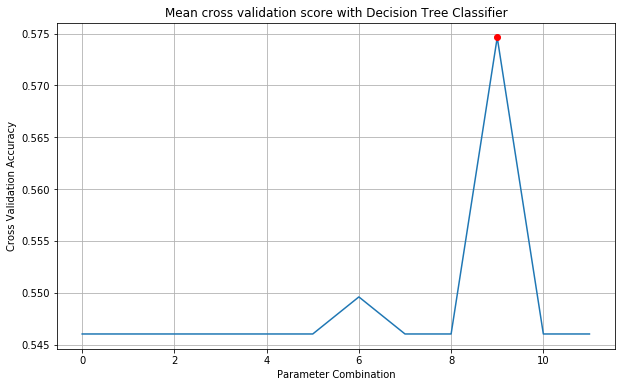

In [96]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(grid.cv_results_['mean_test_score'])
plt.title("Mean cross validation score with Decision Tree Classifier")
plt.plot(grid.best_index_,grid.best_score_,'ro')
plt.xlabel("Parameter Combination")
plt.ylabel("Cross Validation Accuracy")
plt.show()

In [97]:
Classifier = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'],min_samples_split=grid.best_params_['min_samples_split'])
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)

In [98]:
Prediction = pd.DataFrame(columns=X.columns)
Prediction['volatile acidity'] = X_test[:,0]
Prediction['citric acid'] = X_test[:,1]
Prediction['density'] = X_test[:,2]
Prediction['sulphates'] = X_test[:,3]
Prediction['alcohol'] = X_test[:,4]
Prediction['quality'] = y_test
Prediction['Prediction quality'] = y_pred

In [99]:
print(grid.best_params_)
print("Accuracy of prediction: ",accuracy(y_test,y_pred))
print("Number of misclassifications: ", len(y_test) - (accuracy(y_test,y_pred) * len(y_test)),"\n")
Prediction.sample(10)

{'min_samples_split': 0.1, 'max_depth': 4}
Accuracy of prediction:  0.5791666666666667
Number of misclassifications:  202.0 



,volatile acidity,citric acid,density,sulphates,alcohol,quality,Prediction quality
438,0.630,0.02,0.99712,0.75,9.8,5,5
67,0.280,0.28,0.99064,0.39,11.7,7,6
296,0.640,0.23,0.99980,0.59,9.7,5,5
270,0.580,0.20,0.99322,0.49,11.7,5,6
420,0.480,0.24,1.00000,0.56,10.0,6,5
245,0.795,0.00,0.99378,0.52,11.6,5,6
397,0.670,0.55,0.99680,0.62,9.4,5,5
479,0.590,0.49,0.99910,0.56,9.6,4,5
65,0.280,0.47,0.99686,0.67,10.6,7,6
386,0.180,0.34,0.99470,0.78,11.8,6,7


In [100]:
len(y_test)

480